In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [11]:
df = pd.read_csv("/content/wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


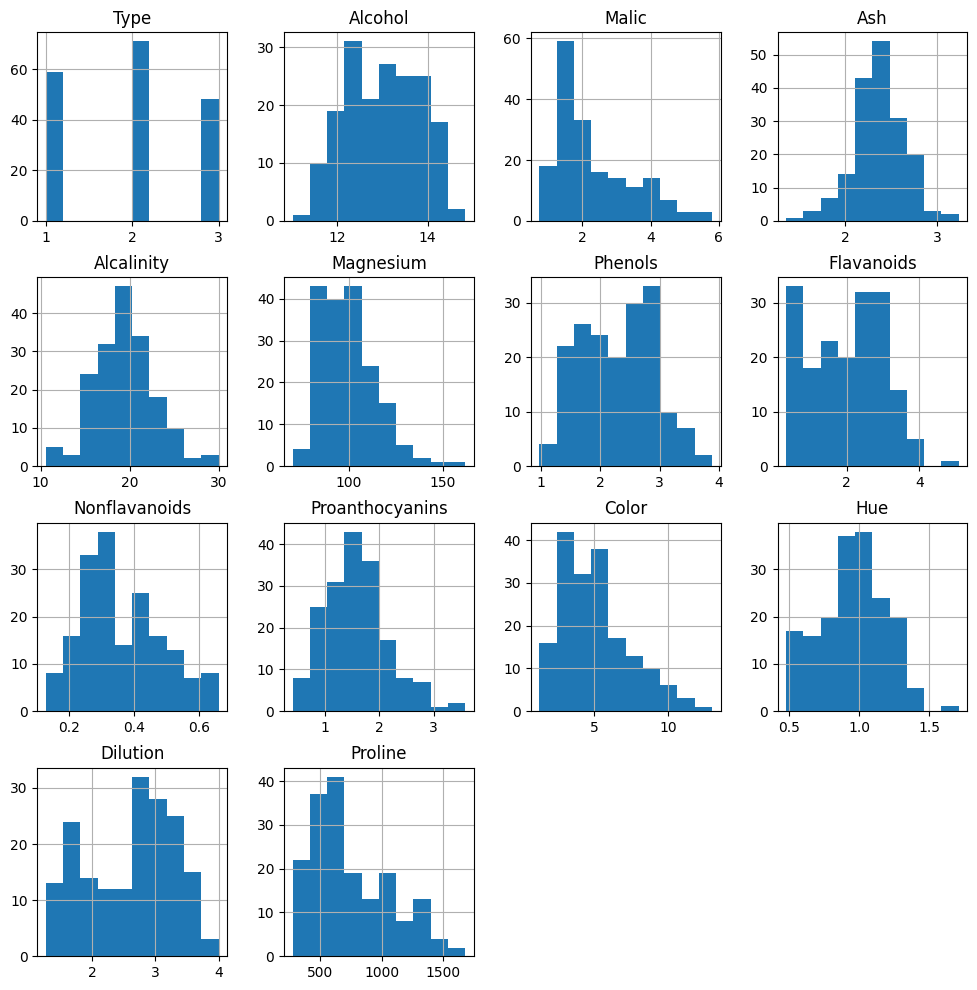

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 12))
plt.show()


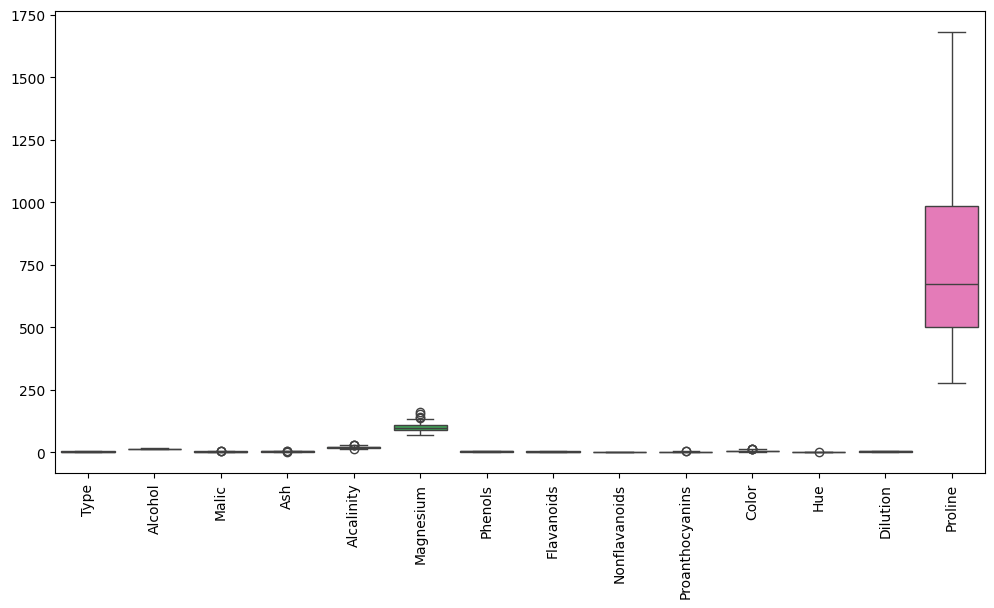

In [15]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
correlation_matrix = df.corr()

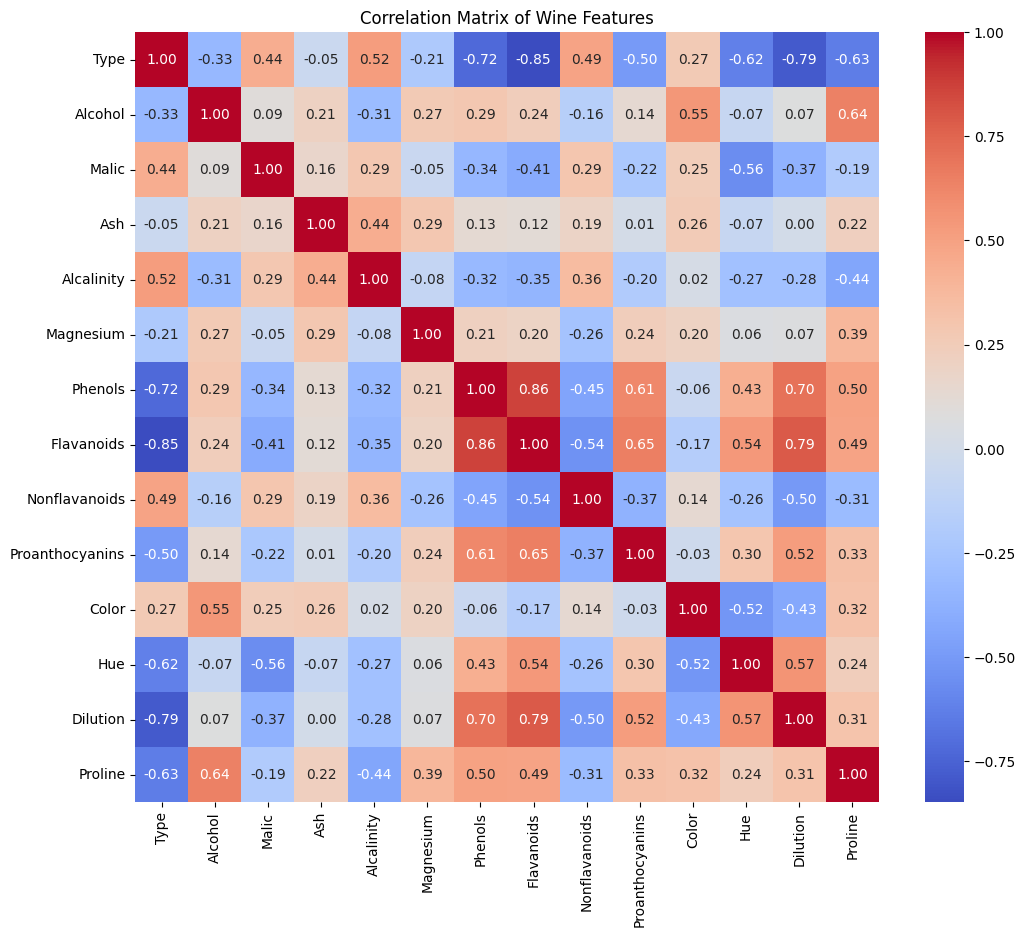

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [21]:
x = df.values
x = StandardScaler().fit_transform(x)

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [23]:
import matplotlib.pyplot as plt
import numpy as np



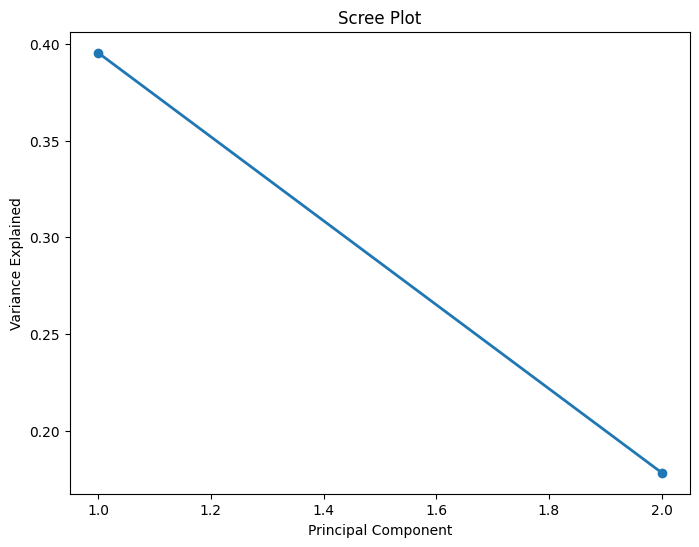

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


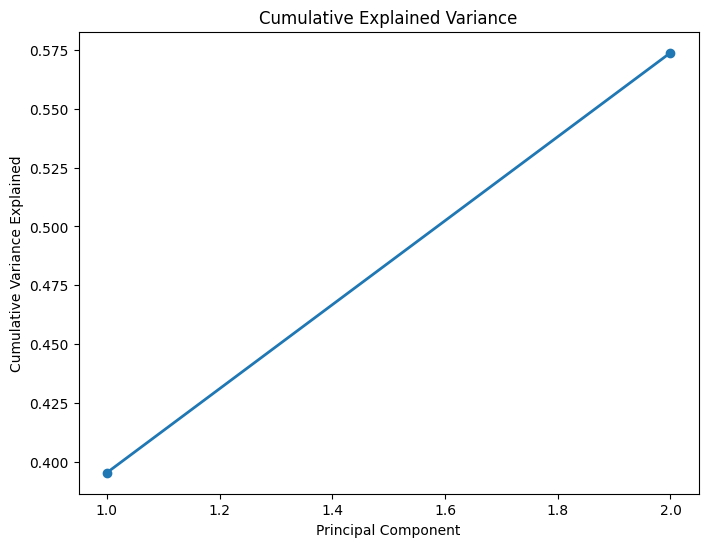

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [26]:
transformed_data = pca.transform(x)

In [30]:
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])


In [33]:
from sklearn.cluster import KMeans
means = KMeans(n_clusters=3, random_state=42)


In [35]:
means.fit(df)

KMeans(n_clusters=3, random_state=42)

In [37]:
cluster_labels = means.labels_

In [38]:
df['Cluster'] = cluster_labels

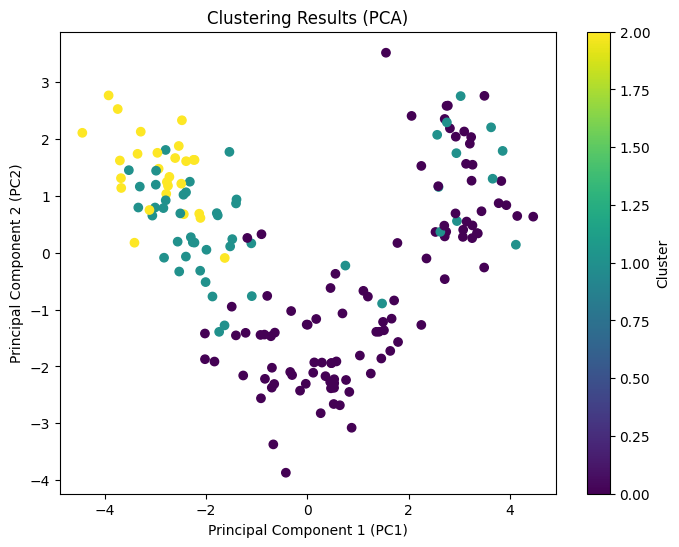

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Clustering Results (PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(df, df['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5595759408365634


In [47]:
davies_bouldin = davies_bouldin_score(df, df['Cluster'])
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 0.5495722763528708


In [49]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3, random_state=42)

In [50]:
kmeans_pca.fit(transformed_df)

KMeans(n_clusters=3, random_state=42)

In [51]:
cluster_labels_pca = kmeans_pca.labels_
transformed_df['Cluster_PCA'] = cluster_labels_pca

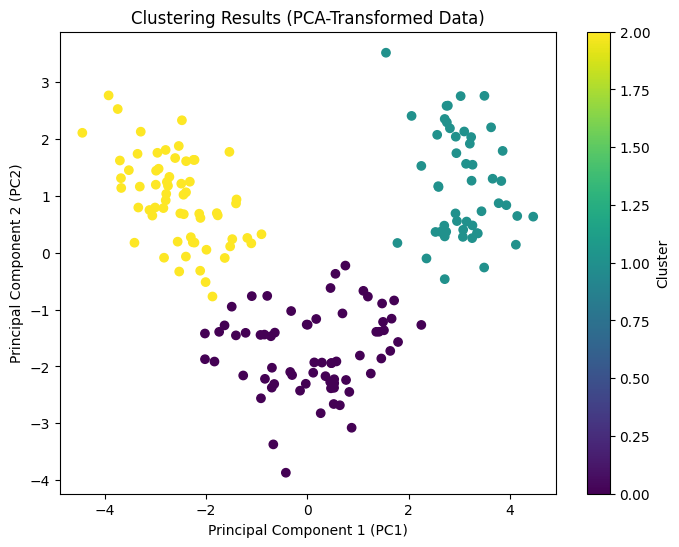

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'], c=transformed_df['Cluster_PCA'], cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Clustering Results (PCA-Transformed Data)')
plt.colorbar(label='Cluster')
plt.show()

In [55]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['Cluster'], transformed_df['Cluster_PCA'])
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.347957579938549


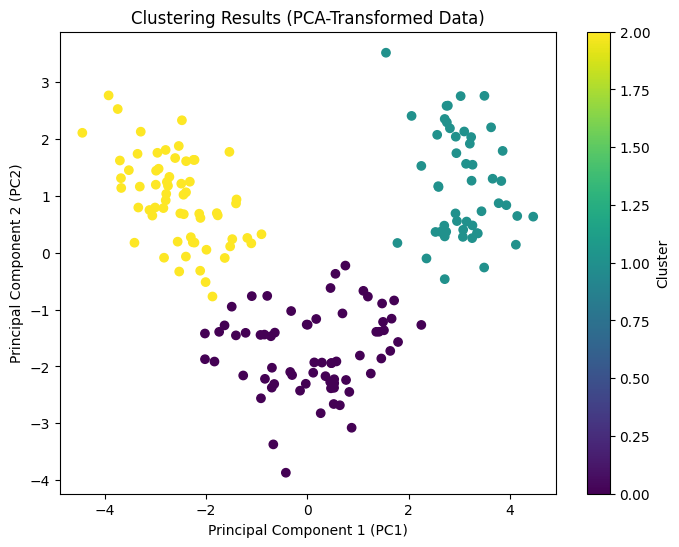

In [56]:

plt.figure(figsize=(8, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'], c=transformed_df['Cluster_PCA'], cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Clustering Results (PCA-Transformed Data)')
plt.colorbar(label='Cluster')
plt.show()

In [57]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['Cluster'], transformed_df['Cluster_PCA'])
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.347957579938549
